In [1]:
# Import required library
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from vislab import visuals as vs
%matplotlib inline
sns.set()

In [2]:
# Read data file to csv
data = pd.read_csv("datasal.csv")
data.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


# Field Description

1. **age**: The age of the individual. It's a continuous variable.
2. **workclass**: The class of work or employment status of the individual. Categories include options like Private sector, various types of government employment, those without pay, and those who have never worked.
3. **education_level**: Describes the highest education level achieved by the individual. It has categories ranging from various school grades to higher education degrees like Bachelors, Masters, and Doctorate.
4. **education-num**: A continuous field representing the number of educational years completed.
5. **marital-status**: Describes the marital status of the individual. Categories include statuses like married to a civilian spouse, divorced, separated, widowed, etc.
6. **occupation**: Describes the occupation or job role of the individual. Examples include technical support, sales, managerial roles, and many others.
7. **relationship**: Describes the family relationship status of the individual in the context of the household. For example, whether the person is a husband, wife, child, or has some other relationship status.
8. **race**: Denotes the race of the individual. Categories include White, Asian-Pacific Islander, Black, and a few others.
9. **sex**: Gender of the individual, categorized as either Male or Female.
10. **capital-gain**: A continuous variable representing the capital gains for the individual.
11. **capital-loss**: Another continuous variable representing the capital losses for the individual.
12. **hours-per-week**: Represents the number of hours the individual works per week. It's a continuous variable.
13. **native-country**: Describes the native country of the individual. It's a categorical variable with countries from around the world listed.
14. **income**: The income category of the individual. It's a binary categorical variable with two possible values: 
   - `>50K`: The individual earns more than $50,000 a year.
   
   - `<=50K`: The individual earns $50,000 a year or less.


---
# Exploratory Data Analysis

In [3]:
print("The number of records in this data is", data.shape[0])

The number of records in this data is 45222


In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### What is the median age of the people in our data?
- The median age of the people in the data is **37**

### What is the 75th percentile of the number of years of education (education-num) 
- 75th percentile of the number of years of education (education-num) is **13**

### Does the capital-gain field have a normal distribution? According to what did you decide?

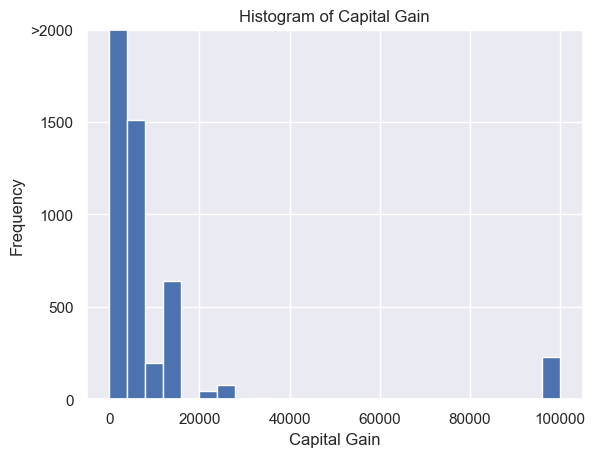

In [5]:
# Plot a histogram of the "capital-gain" field
plt.hist(data["capital-gain"], bins=25)
plt.title("Histogram of Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.ylim(top=2000)
plt.yticks([0, 500, 1000, 1500, 2000], [0, 500, 1000, 1500, ">2000"])
plt.show()

- A bell-shaped curve suggests a normal distribution. The shape of the curve doesn't have any similarity to that of a bell, this means that the **"capital-gain" field does not have a normal distribution**

### Does the hours-per-week field distribute cruises normally? According to what did you decide?

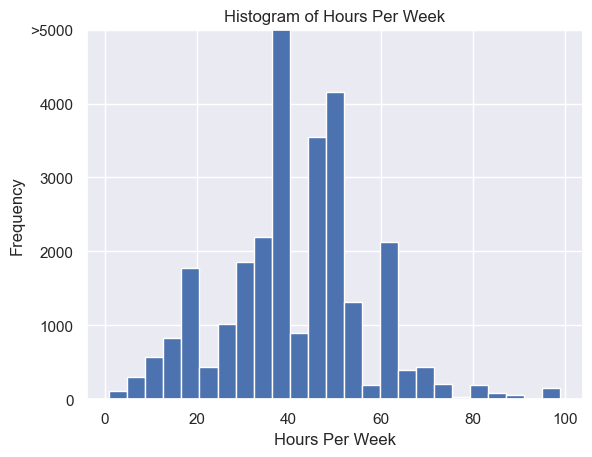

In [6]:
# Plot histogram of Hours Per Week
plt.hist(data["hours-per-week"], bins=25)
plt.title("Histogram of Hours Per Week")
plt.xlabel("Hours Per Week")
plt.ylabel("Frequency")
plt.ylim(top=5000)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], [0, 1000, 2000, 3000, 4000, ">5000"])
plt.show()

- The hours-per-week field is normally distributed because it has a bell-shaped curve

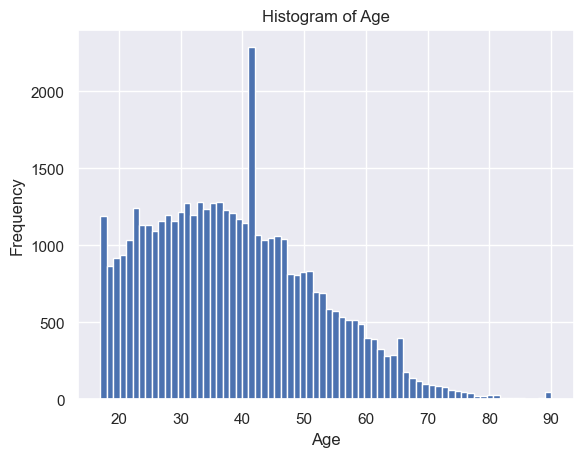

In [7]:
# Plot histogram for the age field
plt.hist(data["age"], bins=70)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

### Calculate the percentage of people who earn over 50 thousand dollars. 

In [8]:
perc_income_over_50k = ((data["income"] == ">50K").sum()/data.shape[0])*100

print(f"The percentage of people who earn over 50 thousand dollars is {perc_income_over_50k.round(2)}%")

The percentage of people who earn over 50 thousand dollars is 24.78%


### Calculate the number of divorced people

In [9]:
divorced_num = len(data[data["marital-status"].str.contains("Divorced")])
print(f"The number of divorced people is {divorced_num}")

The number of divorced people is 6297


### Display a heat map of the percentiles of the fields in the table for the rows with the following indexes: 206,8123,33112,45120,10000.

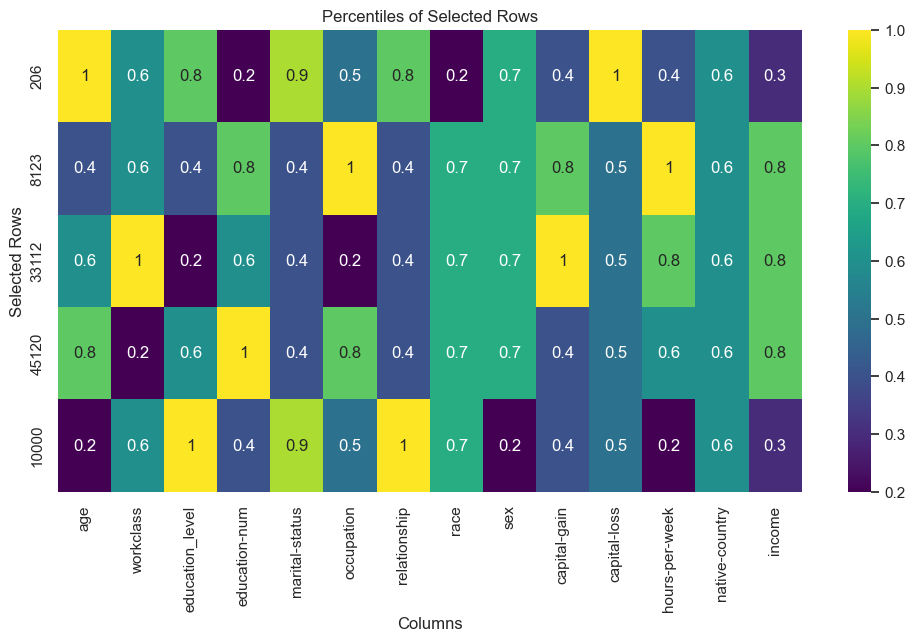

In [10]:
# Select specific rows by index
selected_rows = data.loc[[206, 8123, 33112, 45120, 10000]]

# Calculate percentiles for each field for the selected rows
percentiles = selected_rows.apply(lambda x: x.rank(pct=True))

# Plot heatmap using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(percentiles, annot=True, cmap='viridis')
plt.xlabel("Columns")
plt.ylabel("Selected Rows")
plt.title("Percentiles of Selected Rows")
plt.show()

### How are lines 8123, 33112 similar in terms of percentages?
- Line 8123 and 33112 have similar percentile in the marital_status, relationship, race, sex, capital-loss, native-country, and income columns

### How are lines 206, 45120 similar in terms of percentages?
- Line 206 and 45120 have similar percentile in the sex, capitan-gain and native-country columns

### Create a table containing only the income column (which we will want to repeat later) and a table containing all the columns except the income column

In [11]:
income_raw = data['income']
features_raw = data.drop("income", axis=1)

In [12]:
features_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [13]:
income_raw.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

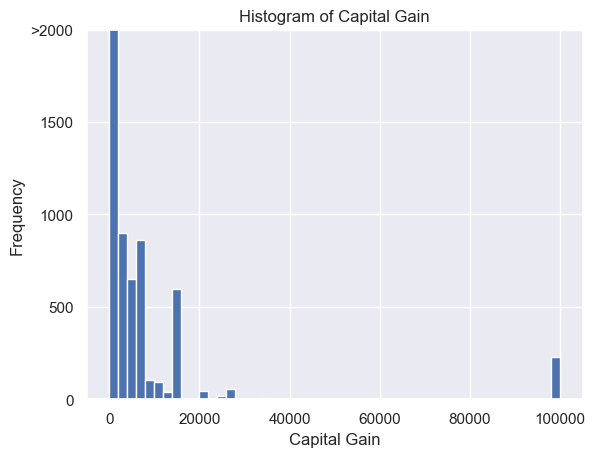

In [14]:
# Plot histogram of capital gain
plt.hist(features_raw["capital-gain"], bins=50)
plt.title("Histogram of Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.ylim(ymax=2000)
plt.yticks([0, 500, 1000, 1500, 2000], [0, 500, 1000, 1500, ">2000"])
plt.show()

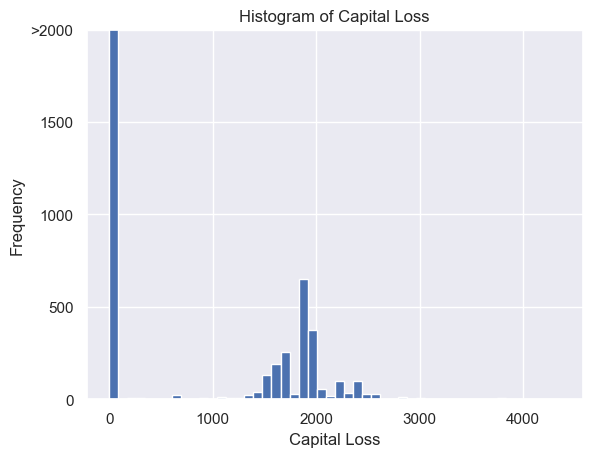

In [15]:
# plot histogram of capital loss
plt.hist(features_raw["capital-loss"], bins=50)
plt.title("Histogram of Capital Loss")
plt.xlabel("Capital Loss")
plt.ylabel("Frequency")
plt.ylim(ymax=2000)
plt.yticks([0, 500, 1000, 1500, 2000], [0, 500, 1000, 1500, ">2000"])
plt.show()

In [16]:
skewed = ["capital-gain", "capital-loss"]
features_log_transformed = pd.DataFrame(features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x+1))

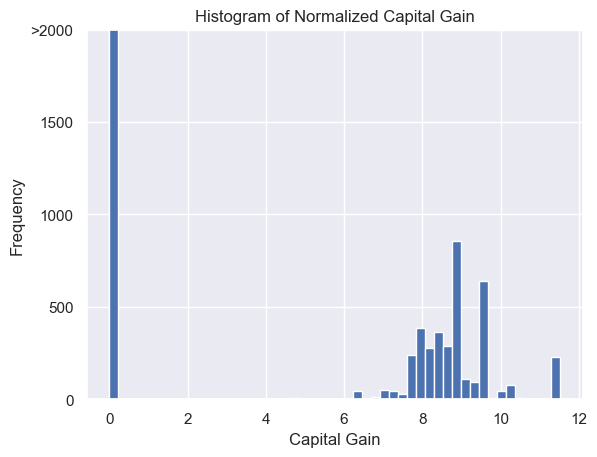

In [17]:
# Plot histogram of normalized capital gain
plt.hist(features_log_transformed["capital-gain"], bins=50)
plt.title("Histogram of Normalized Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.ylim(ymax=2000)
plt.yticks([0, 500, 1000, 1500, 2000], [0, 500, 1000, 1500, ">2000"])
plt.show()

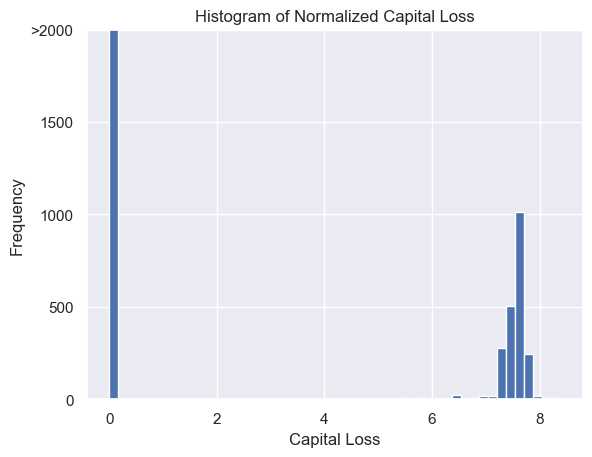

In [18]:
# plot histogram of normalized capital loss
plt.hist(features_log_transformed["capital-loss"], bins=50)
plt.title("Histogram of Normalized Capital Loss")
plt.xlabel("Capital Loss")
plt.ylabel("Frequency")
plt.ylim(ymax=2000)
plt.yticks([0, 500, 1000, 1500, 2000], [0, 500, 1000, 1500, ">2000"])
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output, Image, display

scaler = MinMaxScaler()

In [20]:
features_log_minmax_transformed = pd.DataFrame(features_log_transformed)
numerical = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
features_log_minmax_transformed[numerical] = scaler.fit_transform(features_log_transformed[numerical])

features_log_minmax_transformed.head(7)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica


In [21]:
features_final = pd.get_dummies(features_log_minmax_transformed)
# Name of columns we received after the one-hot-encoding transformation.
print([column for column in features_final.columns])
features_final.head()

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', '

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.800000,0.000000,0.0,0.122449,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.400000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.800000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Number of columns we received after the one-hot-encoding transformation.
print("The number of columns we received after the one-hot-encoding transformation is", features_final.shape[1])

The number of columns we received after the one-hot-encoding transformation is 103


In [23]:
# Transform income_raw
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, income, train_size=0.8)

In [25]:
train_row_num = X_train.shape[0]
test_row_num = X_test.shape[0]
print("Training set rows =", train_row_num)
print("Test set rows =", test_row_num)

Training set rows = 36177
Test set rows = 9045


In [26]:
total_rows = train_row_num + test_row_num
print(data.shape[0])
print(f"The total number of rows sums to {total_rows} which is the same as the number of the original data set")

45222
The total number of rows sums to 45222 which is the same as the number of the original data set


In [27]:
# Import libraries for examining performance
from sklearn.metrics import fbeta_score, accuracy_score

### Define a function whose purpose is to run a specific algorithm on a certain size sample from the data

In [28]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    # Initialize result
    results = {}
    
    # Record start time for training
    start = time()
    
    # Learn model from training set
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    
    # Record end time for training
    end = time()
    
    # Store training time in results
    results["train_time"] = end - start
    
    # Record start time for testing
    start = time()
    
    # Test trained model
    predictions_test = learner.predict(X_test)
    
    predictions_train = learner.predict(X_train[:300])
    
    # Record end time for testing
    end = time()
    
    # Store test time 
    results["pred_time"] = end - start
    
    # Record performance of the model
    results["acc_train"] = accuracy_score(y_train[:300], predictions_train)
    results["acc_test"] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results

In [29]:
# Import algorithm libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.linear_model import SGDClassifier

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


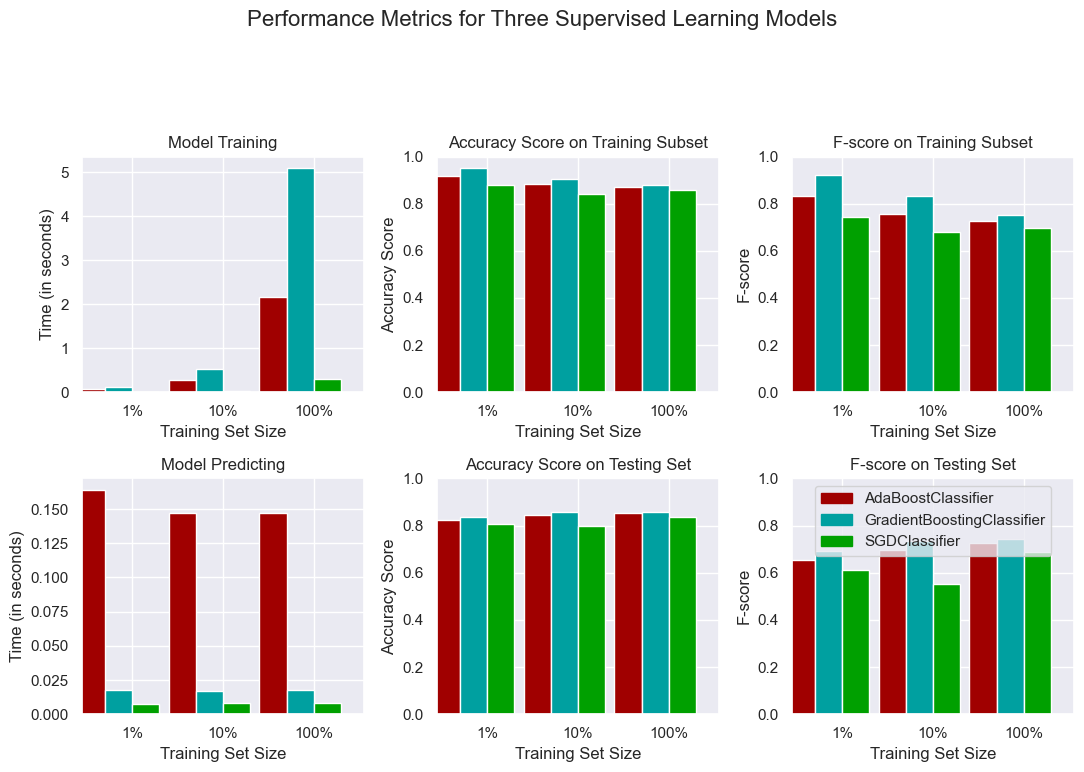

In [30]:
# Initialize the models
clf_A = AdaBoostClassifier(random_state=0) 
clf_B = GradientBoostingClassifier(random_state=0) 
clf_C = SGDClassifier(random_state=0)

# Define the different sample sizes for training
samples_100 = int(len(y_train)) 
samples_10 = int(len(y_train) * 0.1) 
samples_1 = int(len(y_train) * 0.01)

# Initialize results
results = {}

# For each of the algorithms, we run for the 3 sample options and run the function we built that will collect for us the run results of the different algorithms
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]): 
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
vs.evaluate(results)

### Which of the algorithms we ran would you use to get results in the shortest time?
- To get results in the shortest time, the best algorithm to use is SGDClassifier

### If time was not a consideration in choosing the algorithms, which of the 3 algorithms would you choose and why?
- If time was not a consideration, the best algorithm is GradientBoostingClassifier because it has the best accuracy scores on all the testing sets and most of the training set. It also has the highest f-score on the testing sets

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Slice the first 10,000 rows
data_subset = features_final[:10000]

# Apply GMM clustering and compute silhouette scores
gmm_scores = {}
for components in range(2, 8):
    gmm = GaussianMixture(n_components=components, random_state=0, n_init=5)
    cluster_labels = gmm.fit_predict(data_subset)
    silhouette_avg = silhouette_score(data_subset, cluster_labels)
    gmm_scores[components] = silhouette_avg

# Get the number of components with the highest silhouette score for GMM
best_gmm_components = max(gmm_scores, key=gmm_scores.get)
print(f"Best number of components for GMM: {best_gmm_components} with silhouette score of {gmm_scores[best_gmm_components]}")

# Apply KMeans clustering and compute silhouette scores
kmeans_scores = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=5)
    cluster_labels = kmeans.fit_predict(data_subset)
    silhouette_avg = silhouette_score(data_subset, cluster_labels)
    kmeans_scores[k] = silhouette_avg

# Get the K value with the highest silhouette score for KMeans
best_k = max(kmeans_scores, key=kmeans_scores.get)
print(f"Best K for KMeans: {best_k} with silhouette score of {kmeans_scores[best_k]}");

Best number of components for GMM: 2 with silhouette score of 0.16346510737542397
Best K for KMeans: 3 with silhouette score of 0.16470528226679215


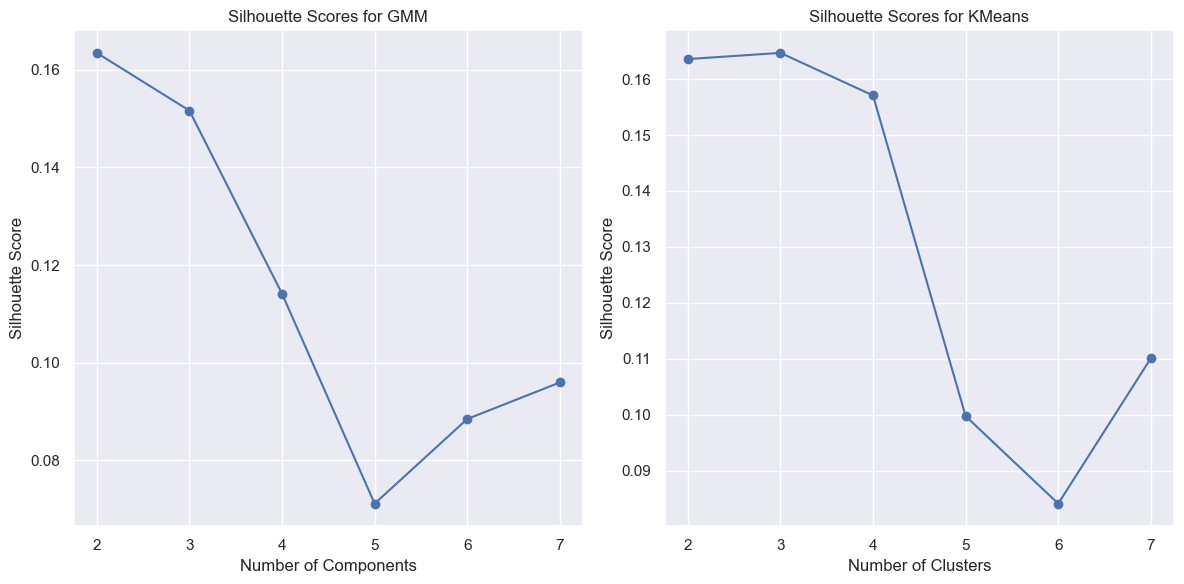

In [32]:
# Visualizing the silhouette scores for GMM
plt.figure(figsize=(12, 6))

# Plot for GMM
plt.subplot(1, 2, 1)
plt.plot(list(gmm_scores.keys()), list(gmm_scores.values()), marker='o', linestyle='-')
plt.title('Silhouette Scores for GMM')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 8))

# Plot for KMeans
plt.subplot(1, 2, 2)
plt.plot(list(kmeans_scores.keys()), list(kmeans_scores.values()), marker='o', linestyle='-')
plt.title('Silhouette Scores for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 8))

plt.tight_layout()
plt.show()